# LINEAR REGRESSION.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
cars=pd.read_csv("mtcars.csv")
cars.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [7]:
cars.shape

(32, 12)

In [8]:
cars.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  32 non-null     object 
 1   mpg        32 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       32 non-null     float64
 4   hp         32 non-null     int64  
 5   drat       32 non-null     float64
 6   wt         32 non-null     float64
 7   qsec       32 non-null     float64
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [14]:
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.854553,-0.848323,-0.748338,0.664093,-0.876525,0.362559,0.610570,0.658809,0.480045,-0.510205
cyl,-0.854553,1.000000,0.904855,0.821048,-0.639699,0.828594,-0.513701,-0.773405,-0.621461,-0.453460,0.554153
disp,-0.848323,0.904855,1.000000,0.784517,-0.650057,0.909787,-0.389220,-0.676439,-0.640002,-0.520970,0.415707
hp,-0.748338,0.821048,0.784517,1.000000,-0.352187,0.666635,-0.732310,-0.717553,-0.283276,-0.061141,0.772405
drat,0.664093,-0.639699,-0.650057,-0.352187,1.000000,-0.693334,-0.117535,0.279943,0.763135,0.710735,-0.000400
wt,-0.876525,0.828594,0.909787,0.666635,-0.693334,1.000000,-0.170668,-0.547939,-0.718505,-0.588810,0.418441
qsec,0.362559,-0.513701,-0.389220,-0.732310,-0.117535,-0.170668,1.000000,0.772373,-0.207698,-0.392472,-0.756134
vs,0.610570,-0.773405,-0.676439,-0.717553,0.279943,-0.547939,0.772373,1.000000,0.181463,0.098709,-0.632025
am,0.658809,-0.621461,-0.640002,-0.283276,0.763135,-0.718505,-0.207698,0.181463,1.000000,0.842662,0.035518
gear,0.480045,-0.453460,-0.520970,-0.061141,0.710735,-0.588810,-0.392472,0.098709,0.842662,1.000000,0.305056


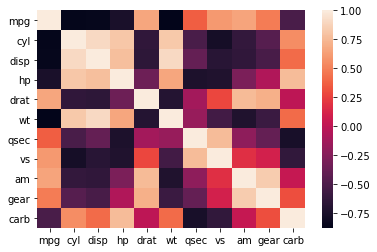

In [17]:
sb.heatmap(cars.corr())

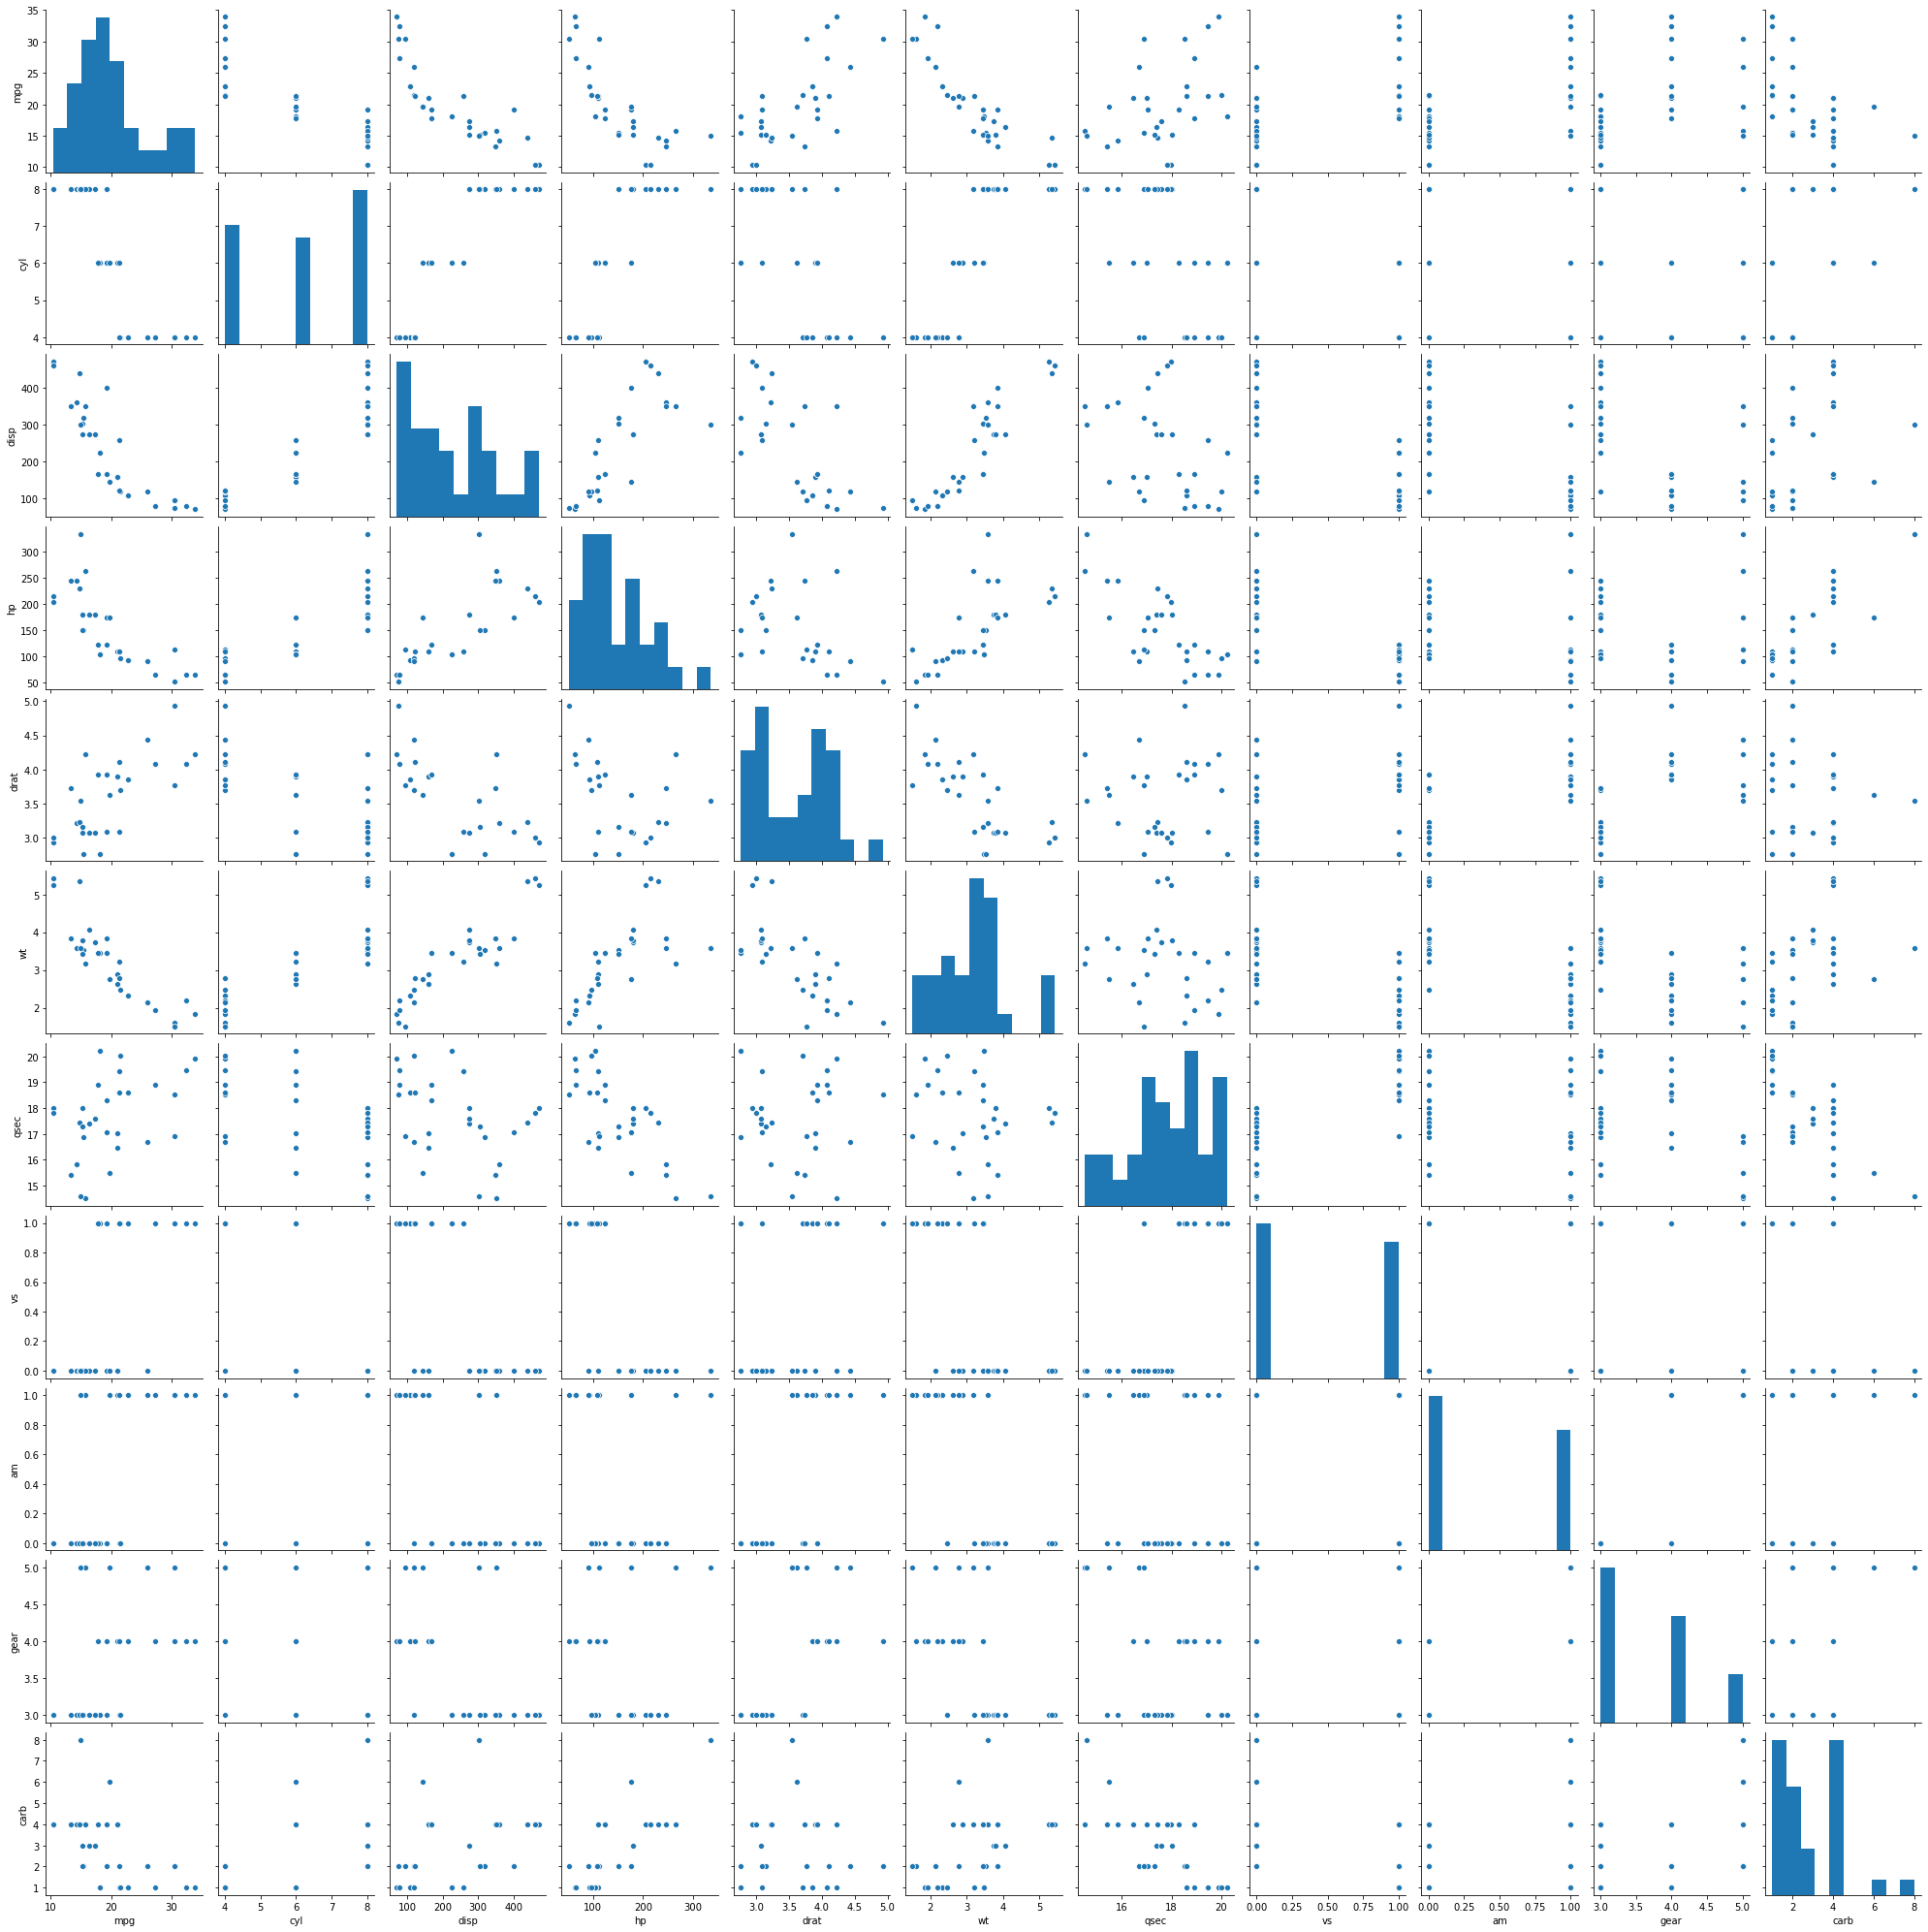

In [15]:
sb.pairplot(cars) # creates histograms of all columns

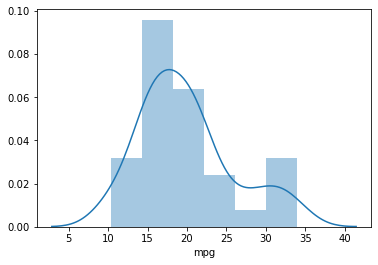

In [16]:
sb.distplot(cars['mpg']) #to check the distribution of target column

In [18]:
F=cars.loc[:,['hp','wt','am',]]
g=cars.mpg

In [19]:
F_train,F_test,g_train,g_test=train_test_split(F,g,random_state=12)

In [20]:
print("F_train Shape",F_train.shape)
print("F_test Shape",F_test.shape)
print("g_train",g_train.shape)
print("g_test",g_test.shape)

F_train Shape (24, 3)
F_test Shape (8, 3)
g_train (24,)
g_test (8,)


In [21]:
model=LinearRegression()
model.fit(F_train,g_train)
g_predict=model.predict(F_test)

In [22]:
r2_score(g_test,g_predict)

0.8901075696975214

In [23]:
g_test.head()

7     18.1
24    19.2
18    30.4
14    10.4
1     21.0
Name: mpg, dtype: float64

In [24]:
g_predict

array([19.42408007, 15.87360806, 29.22404488, 11.49169043, 24.11163663,
       13.22274237, 26.03842827, 10.70998488])

In [25]:
g_predict[0:50]

array([19.42408007, 15.87360806, 29.22404488, 11.49169043, 24.11163663,
       13.22274237, 26.03842827, 10.70998488])

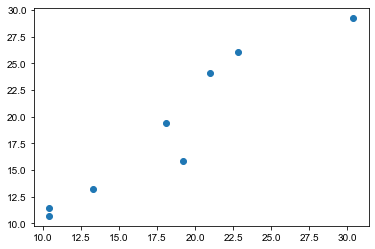

In [28]:
plt.scatter(g_test,g_predict)
sb.set_style('whitegrid')

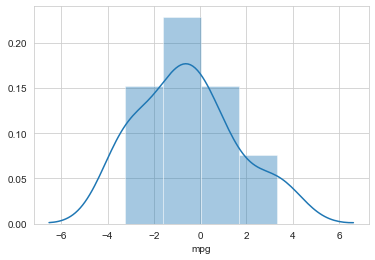

In [29]:
sb.distplot(g_test-g_predict) # Its a histogram of residuals which is normal distribution. therefore our modelis correct choice for data set

# Regression evaluation Metrics

In [30]:
from sklearn import metrics
metrics.mean_absolute_error(g_test,g_predict)


1.7069281210897238

In [31]:
metrics.mean_squared_error(g_test,g_predict)

4.458061166295801

In [32]:
np.sqrt(metrics.mean_squared_error(g_test,g_predict))

2.1114121261127115